<a href="https://www.kaggle.com/code/nguyenn95/analyze-bike-usage-between-casual-and-member?scriptVersionId=135888802" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## 1. Project goal
> **How do annual members and casual riders use Cyclistic bikes differently?**

## 2. Initialization and Installation

In [1]:
csv_files_dir <- "/kaggle/input/062022-052023-cyclistic-trip-data"
csv_files_dir

[1] "/kaggle/input/062022-052023-cyclistic-trip-data"

In [2]:
# # # # # # # # # # # # # # # # # # # # # # #
# Install required packages                 #
# tidyverse for data import and wrangling   #
# lubridate for date functions              #
# ggplot for visualization                  #
# # # # # # # # # # # # # # # # # # # # # # #
library(tidyverse)
library(lubridate)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## 3. Load data

In [3]:
csv_files <- dir(csv_files_dir, full.names = TRUE)

In [4]:
csv_files

[1] "/kaggle/input/062022-052023-cyclistic-trip-data/2022-06_trip-data.csv"
 [2] "/kaggle/input/062022-052023-cyclistic-trip-data/2022-07_trip-data.csv"
 [3] "/kaggle/input/062022-052023-cyclistic-trip-data/2022-08_tripdata.csv" 
 [4] "/kaggle/input/062022-052023-cyclistic-trip-data/2022-09_trip-data.csv"
 [5] "/kaggle/input/062022-052023-cyclistic-trip-data/2022-10_trip-data.csv"
 [6] "/kaggle/input/062022-052023-cyclistic-trip-data/2022-11_trip-data.csv"
 [7] "/kaggle/input/062022-052023-cyclistic-trip-data/2022-12_trip-data.csv"
 [8] "/kaggle/input/062022-052023-cyclistic-trip-data/2023-01_trip-data.csv"
 [9] "/kaggle/input/062022-052023-cyclistic-trip-data/2023-02_trip-data.csv"
[10] "/kaggle/input/062022-052023-cyclistic-trip-data/2023-03_trip-data.csv"
[11] "/kaggle/input/062022-052023-cyclistic-trip-data/2023-04_trip-data.csv"
[12] "/kaggle/input/062022-052023-cyclistic-trip-data/2023-05-trip-data.csv"

In [5]:
# Load all data from csv files into 1 dataframe
all_trips <- do.call(rbind, lapply(csv_files, read.csv))

## 4. Clean Data

In [6]:
# Alternative: tail(all_trips)
head(all_trips) # 6 rows

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,600CFD130D0FD2A4,electric_bike,2022-06-30 17:27:53,2022-06-30 17:35:15,,,,,41.89,-87.62,41.91,-87.62,casual
2,F5E6B5C1682C6464,electric_bike,2022-06-30 18:39:52,2022-06-30 18:47:28,,,,,41.91,-87.62,41.93,-87.63,casual
3,B6EB6D27BAD771D2,electric_bike,2022-06-30 11:49:25,2022-06-30 12:02:54,,,,,41.91,-87.65,41.89,-87.61,casual
4,C9C320375DE1D5C6,electric_bike,2022-06-30 11:15:25,2022-06-30 11:19:43,,,,,41.80,-87.66,41.80,-87.65,casual
5,56C055851023BE98,electric_bike,2022-06-29 23:36:50,2022-06-29 23:45:17,,,,,41.91,-87.63,41.93,-87.64,casual
6,B664188E8163D045,electric_bike,2022-06-30 16:42:10,2022-06-30 16:58:22,,,,,42.03,-87.71,42.06,-87.73,casual


In [7]:
colnames(all_trips)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

In [8]:
nrow(all_trips)

[1] 5829030

In [9]:
dim(all_trips)

[1] 5829030      13

In [10]:
# columns and data types (numeric, character, etc)
str(all_trips)

'data.frame':	5829030 obs. of  13 variables:
 $ ride_id           : chr  "600CFD130D0FD2A4" "F5E6B5C1682C6464" "B6EB6D27BAD771D2" "C9C320375DE1D5C6" ...
 $ rideable_type     : chr  "electric_bike" "electric_bike" "electric_bike" "electric_bike" ...
 $ started_at        : chr  "2022-06-30 17:27:53" "2022-06-30 18:39:52" "2022-06-30 11:49:25" "2022-06-30 11:15:25" ...
 $ ended_at          : chr  "2022-06-30 17:35:15" "2022-06-30 18:47:28" "2022-06-30 12:02:54" "2022-06-30 11:19:43" ...
 $ start_station_name: chr  "" "" "" "" ...
 $ start_station_id  : chr  "" "" "" "" ...
 $ end_station_name  : chr  "" "" "" "" ...
 $ end_station_id    : chr  "" "" "" "" ...
 $ start_lat         : num  41.9 41.9 41.9 41.8 41.9 ...
 $ start_lng         : num  -87.6 -87.6 -87.7 -87.7 -87.6 ...
 $ end_lat           : num  41.9 41.9 41.9 41.8 41.9 ...
 $ end_lng           : num  -87.6 -87.6 -87.6 -87.7 -87.6 ...
 $ member_casual     : chr  "casual" "casual" "casual" "casual" ...


In [11]:
# Ignore "start_station_name" column to "end_lng" column
all_trips <- all_trips %>%
    select(-c(start_station_name, start_station_id, end_station_name, end_station_id, start_lat, start_lng, end_lat,end_lng))

In [12]:
# Code to convert ride_id and rideable_type to character so that they can stack correctly if program not recognize
# all_trips <- all_trips %>%
#     mutate(ride_id=as.character(ride_id)) %>%
#     mutate(rideable_type=as.character(rideable_type))

In [13]:
# Check dataframe after transformed
# str(all_trips)

In [14]:
head(all_trips)

,ride_id,rideable_type,started_at,ended_at,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>
1,600CFD130D0FD2A4,electric_bike,2022-06-30 17:27:53,2022-06-30 17:35:15,casual
2,F5E6B5C1682C6464,electric_bike,2022-06-30 18:39:52,2022-06-30 18:47:28,casual
3,B6EB6D27BAD771D2,electric_bike,2022-06-30 11:49:25,2022-06-30 12:02:54,casual
4,C9C320375DE1D5C6,electric_bike,2022-06-30 11:15:25,2022-06-30 11:19:43,casual
5,56C055851023BE98,electric_bike,2022-06-29 23:36:50,2022-06-29 23:45:17,casual
6,B664188E8163D045,electric_bike,2022-06-30 16:42:10,2022-06-30 16:58:22,casual


In [15]:
summary(all_trips)

   ride_id          rideable_type       started_at          ended_at        
 Length:5829030     Length:5829030     Length:5829030     Length:5829030    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
 member_casual     
 Length:5829030    
 Class :character  
 Mode  :character  

In [16]:
# How many casual and member in dataframe?
table(all_trips$member_casual)


 casual  member 
2312073 3516957 

In [17]:
# Add columns that list the date, month, day, and year of each ride
# This will allow us to aggregate ride data for each month, day, or year ... before completing
# these operations we could only aggregate at the ride level
# https://www.statmethods.net/input/dates.html more on date formats in R found at that link
all_trips$date <- as.Date(all_trips$started_at) #The default format is yyyy-mm-dd
all_trips$month <- format(as.Date(all_trips$date), "%m")
all_trips$day <- format(as.Date(all_trips$date), "%d")
all_trips$year <- format(as.Date(all_trips$date), "%Y")
all_trips$day_of_week <- format(as.Date(all_trips$date), "%A")

In [18]:
head(all_trips)

,ride_id,rideable_type,started_at,ended_at,member_casual,date,month,day,year,day_of_week
,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>
1,600CFD130D0FD2A4,electric_bike,2022-06-30 17:27:53,2022-06-30 17:35:15,casual,2022-06-30,06,30,2022,Thursday
2,F5E6B5C1682C6464,electric_bike,2022-06-30 18:39:52,2022-06-30 18:47:28,casual,2022-06-30,06,30,2022,Thursday
3,B6EB6D27BAD771D2,electric_bike,2022-06-30 11:49:25,2022-06-30 12:02:54,casual,2022-06-30,06,30,2022,Thursday
4,C9C320375DE1D5C6,electric_bike,2022-06-30 11:15:25,2022-06-30 11:19:43,casual,2022-06-30,06,30,2022,Thursday
5,56C055851023BE98,electric_bike,2022-06-29 23:36:50,2022-06-29 23:45:17,casual,2022-06-29,06,29,2022,Wednesday
6,B664188E8163D045,electric_bike,2022-06-30 16:42:10,2022-06-30 16:58:22,casual,2022-06-30,06,30,2022,Thursday


In [19]:
# Calculate difference in date and time: https://stat.ethz.ch/R-manual/R-devel/library/base/html/difftime.html
all_trips$ride_length <- difftime(all_trips$ended_at, all_trips$started_at) # seconds

In [20]:
head(all_trips)

,ride_id,rideable_type,started_at,ended_at,member_casual,date,month,day,year,day_of_week,ride_length
,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<drtn>
1,600CFD130D0FD2A4,electric_bike,2022-06-30 17:27:53,2022-06-30 17:35:15,casual,2022-06-30,06,30,2022,Thursday,442 secs
2,F5E6B5C1682C6464,electric_bike,2022-06-30 18:39:52,2022-06-30 18:47:28,casual,2022-06-30,06,30,2022,Thursday,456 secs
3,B6EB6D27BAD771D2,electric_bike,2022-06-30 11:49:25,2022-06-30 12:02:54,casual,2022-06-30,06,30,2022,Thursday,809 secs
4,C9C320375DE1D5C6,electric_bike,2022-06-30 11:15:25,2022-06-30 11:19:43,casual,2022-06-30,06,30,2022,Thursday,258 secs
5,56C055851023BE98,electric_bike,2022-06-29 23:36:50,2022-06-29 23:45:17,casual,2022-06-29,06,29,2022,Wednesday,507 secs
6,B664188E8163D045,electric_bike,2022-06-30 16:42:10,2022-06-30 16:58:22,casual,2022-06-30,06,30,2022,Thursday,972 secs


In [21]:
str(all_trips)

'data.frame':	5829030 obs. of  11 variables:
 $ ride_id      : chr  "600CFD130D0FD2A4" "F5E6B5C1682C6464" "B6EB6D27BAD771D2" "C9C320375DE1D5C6" ...
 $ rideable_type: chr  "electric_bike" "electric_bike" "electric_bike" "electric_bike" ...
 $ started_at   : chr  "2022-06-30 17:27:53" "2022-06-30 18:39:52" "2022-06-30 11:49:25" "2022-06-30 11:15:25" ...
 $ ended_at     : chr  "2022-06-30 17:35:15" "2022-06-30 18:47:28" "2022-06-30 12:02:54" "2022-06-30 11:19:43" ...
 $ member_casual: chr  "casual" "casual" "casual" "casual" ...
 $ date         : Date, format: "2022-06-30" "2022-06-30" ...
 $ month        : chr  "06" "06" "06" "06" ...
 $ day          : chr  "30" "30" "30" "30" ...
 $ year         : chr  "2022" "2022" "2022" "2022" ...
 $ day_of_week  : chr  "Thursday" "Thursday" "Thursday" "Thursday" ...
 $ ride_length  : 'difftime' num  442 456 809 258 ...
  ..- attr(*, "units")= chr "secs"


In [22]:
# "ride_length" needs to be numeric so that can run calculations
is.numeric(all_trips$ride_length)

[1] FALSE

In [23]:
all_trips$ride_length <- as.numeric(all_trips$ride_length)

In [24]:
head(all_trips)

,ride_id,rideable_type,started_at,ended_at,member_casual,date,month,day,year,day_of_week,ride_length
,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,600CFD130D0FD2A4,electric_bike,2022-06-30 17:27:53,2022-06-30 17:35:15,casual,2022-06-30,06,30,2022,Thursday,442
2,F5E6B5C1682C6464,electric_bike,2022-06-30 18:39:52,2022-06-30 18:47:28,casual,2022-06-30,06,30,2022,Thursday,456
3,B6EB6D27BAD771D2,electric_bike,2022-06-30 11:49:25,2022-06-30 12:02:54,casual,2022-06-30,06,30,2022,Thursday,809
4,C9C320375DE1D5C6,electric_bike,2022-06-30 11:15:25,2022-06-30 11:19:43,casual,2022-06-30,06,30,2022,Thursday,258
5,56C055851023BE98,electric_bike,2022-06-29 23:36:50,2022-06-29 23:45:17,casual,2022-06-29,06,29,2022,Wednesday,507
6,B664188E8163D045,electric_bike,2022-06-30 16:42:10,2022-06-30 16:58:22,casual,2022-06-30,06,30,2022,Thursday,972


In [25]:
str(all_trips)

'data.frame':	5829030 obs. of  11 variables:
 $ ride_id      : chr  "600CFD130D0FD2A4" "F5E6B5C1682C6464" "B6EB6D27BAD771D2" "C9C320375DE1D5C6" ...
 $ rideable_type: chr  "electric_bike" "electric_bike" "electric_bike" "electric_bike" ...
 $ started_at   : chr  "2022-06-30 17:27:53" "2022-06-30 18:39:52" "2022-06-30 11:49:25" "2022-06-30 11:15:25" ...
 $ ended_at     : chr  "2022-06-30 17:35:15" "2022-06-30 18:47:28" "2022-06-30 12:02:54" "2022-06-30 11:19:43" ...
 $ member_casual: chr  "casual" "casual" "casual" "casual" ...
 $ date         : Date, format: "2022-06-30" "2022-06-30" ...
 $ month        : chr  "06" "06" "06" "06" ...
 $ day          : chr  "30" "30" "30" "30" ...
 $ year         : chr  "2022" "2022" "2022" "2022" ...
 $ day_of_week  : chr  "Thursday" "Thursday" "Thursday" "Thursday" ...
 $ ride_length  : num  442 456 809 258 507 ...


In [26]:
# The data has been processed to remove trips that are taken by staff as they service and inspect the system; 
# and any trips that were below 60 seconds in length (potentially false starts or users trying to re-dock a bike to ensure it was secure).
# Remove rows with conditions: https://www.datasciencemadesimple.com/delete-or-drop-rows-in-r-with-conditions-2/
all_trips_v2 <- all_trips[!(all_trips$ride_length <= 60),]

In [27]:
nrow(all_trips_v2)

[1] 5681704

## 5. Conduct Descriptive Analysis

#### All figures below in seconds

In [28]:
mean_ride_len <- mean(all_trips_v2$ride_length)
mean_ride_len

[1] 1151.218

In [29]:
med_ride_len <- median(all_trips_v2$ride_length)
med_ride_len

[1] 607

In [30]:
max_ride_len <- max(all_trips_v2$ride_length)
max_ride_len

[1] 2483235

In [31]:
min_ride_len <- min(all_trips_v2$ride_length)
min_ride_len

[1] 61

### All figures in format "dd hh mm ss"

In [32]:
seconds_to_period(mean_ride_len)

[1] "19M 11.2183109151797S"

In [33]:
seconds_to_period(med_ride_len)

[1] "10M 7S"

In [34]:
seconds_to_period(max_ride_len)

[1] "28d 17H 47M 15S"

In [35]:
seconds_to_period(min_ride_len)

[1] "1M 1S"

### Aggregation Analysis

In [36]:
summary(all_trips_v2$ride_length)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     61     352     607    1151    1076 2483235 

In [37]:
# compare average riding duration (in seconds)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN=mean)

all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,1732.5911
member,767.8521


In [38]:
# how skewness of trip duration when comparing mean
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN=median)

all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,754
member,532


In [39]:
# each distribution skews left or right?
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = max)

all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,2483235
member,93580


In [40]:
# clearly see that all distribution skew right but casual more. Why?
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = min)

all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,61
member,61


In [41]:
# Compare average ride time by days
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN=mean)

all_trips_v2$member_casual,all_trips_v2$day_of_week,all_trips_v2$ride_length
<chr>,<chr>,<dbl>
casual,Friday,1680.1237
member,Friday,760.2645
casual,Monday,1692.1567
member,Monday,729.2894
casual,Saturday,1970.0881
member,Saturday,857.0840
casual,Sunday,2050.5381
member,Sunday,853.4273
casual,Thursday,1496.7111


In [42]:
# just order days for looking logically
all_trips_v2$day_of_week <- ordered(all_trips_v2$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

In [43]:
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN=mean)

all_trips_v2$member_casual,all_trips_v2$day_of_week,all_trips_v2$ride_length
<chr>,<ord>,<dbl>
casual,Sunday,2050.5381
member,Sunday,853.4273
casual,Monday,1692.1567
member,Monday,729.2894
casual,Tuesday,1553.3178
member,Tuesday,737.4560
casual,Wednesday,1470.2631
member,Wednesday,732.8143
casual,Thursday,1496.7111


In [44]:
# Compare average trip duration by days using pipe
all_trips_v2 %>%
    mutate(weekday = wday(started_at, label = TRUE)) %>% # creates weekday field using wday() - I am learning pipe and mutate :)
    group_by(member_casual, weekday) %>% # groups by usertype and weekday
    summarize(
        number_of_rides=n(), # calculates the number of rides and average duration
        average_duration = mean(ride_length) # calculates the average ride time
    ) %>%
    arrange(member_casual, weekday) # sorts

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


member_casual,weekday,number_of_rides,average_duration
<chr>,<ord>,<int>,<dbl>
casual,Sun,366715,2050.5381
casual,Mon,251818,1692.1567
casual,Tue,264503,1553.3178
casual,Wed,285093,1470.2631
casual,Thu,305988,1496.7111
casual,Fri,338490,1680.1237
casual,Sat,445178,1970.0881
member,Sun,383808,853.4273
member,Mon,459011,729.2894


`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


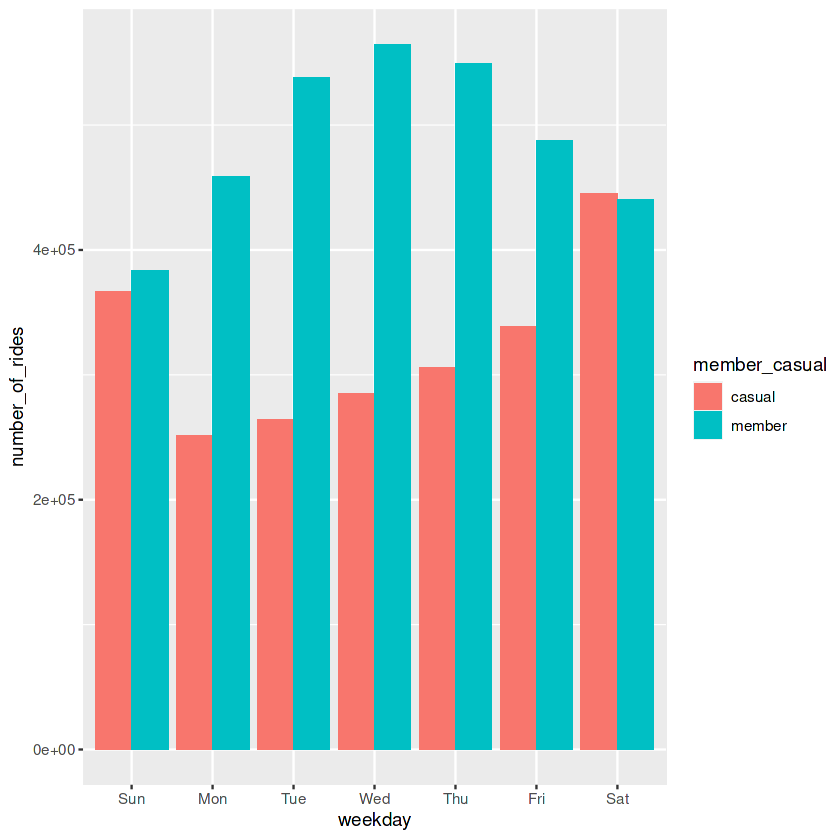

In [45]:
# Visualize the number of rides by rider type
all_trips_v2 %>%
    mutate(weekday=wday(started_at, label = TRUE)) %>%
    group_by(member_casual, weekday) %>%
    summarize(number_of_rides=n(), average_ride_time=mean(ride_length)) %>%
    arrange(member_casual, weekday) %>%
    ggplot(mapping=aes(x=weekday, y=number_of_rides, fill=member_casual)) + geom_col(position="dodge")

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


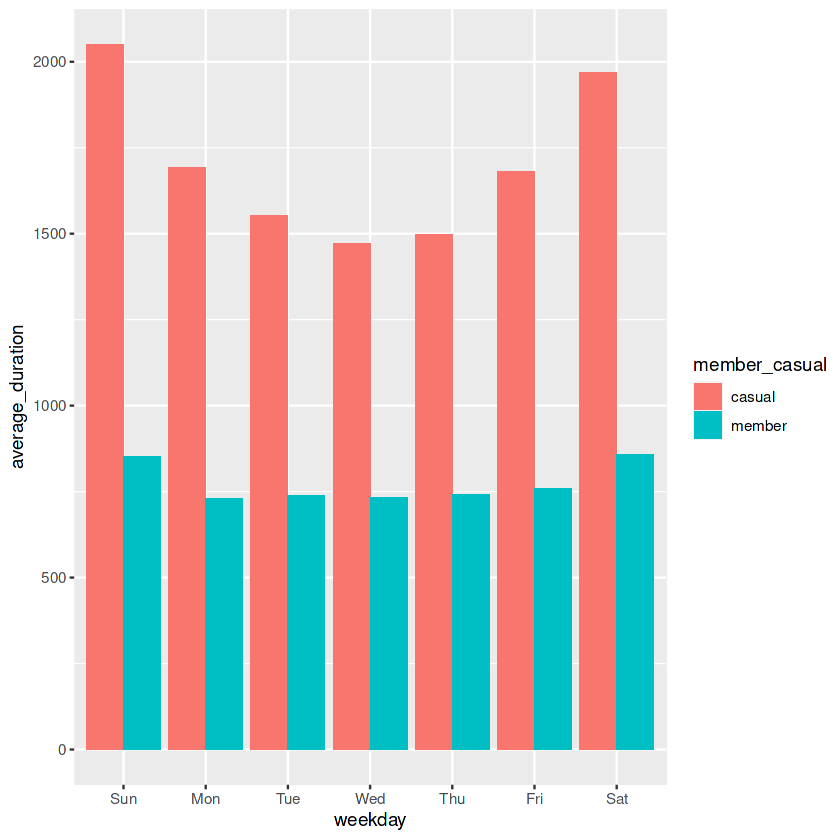

In [46]:
# Visualize average duration by days
all_trips_v2 %>%
    mutate(weekday = wday(started_at, label = TRUE)) %>%
    group_by(member_casual, weekday) %>%
    summarise(number_of_rides = n(), average_duration = mean(ride_length)) %>%
    arrange(member_casual, weekday) %>%
    ggplot(aes(x = weekday, y = average_duration, fill = member_casual)) + geom_col(position = "dodge")

## 6. Key findings

## 7. Top 3 recommendations

## * Export Summary file for further analysis

In [47]:
# Create a csv file that will be visualized in Excel, Tableau, or presentation software
# N.B.: This file location is for a Kaggle If you are working on a PC, change the file location
# accordingly (most likely "C:\Users\YOUR_USERNAME\Desktop\...") to export the data. For Mac user,
# location will be "~/Desktop/...."
# You can read more here: https://datatofish.com/export-dataframe-to-csv-in-r/

# Unlock this code if you want to download from Kaggle workspace or use it in local desktop
# counts = aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN=mean)
# write_csv(counts,file="./avg_ride_length.csv")

## * Appendix

- SQL scripts: [Cleaning](https://github.com/NguyenN95/Cyclistic-Data-Analysis/blob/main/cleaning-script.sql) and [Statistical Analysis](https://github.com/NguyenN95/Cyclistic-Data-Analysis/blob/main/manipulation-script.sql)
- Using Google Sheet (partial data in 05/2023): https://docs.google.com/spreadsheets/d/1MVSvGrj2j5LMOvuvO2_nmV9w2frjhnV27fHL112lSzA/
- Dataset: https://www.kaggle.com/datasets/nguyenn95/062022-052023-cyclistic-trip-data
- Tableau: TBA